THIS IS AN EXAMPLE ABOUT HOW TO DOWNLOAD A DATABASE, CREATE A PICKLE FILE AND THEN LOAD IT INTO A NETWORK

In [1]:
#first import pypath and the omnipath module

from pypath.core import network
from pypath.resources import network as netres
from pypath import omnipath

In [2]:
#then import the wrapper

from pypath_wrapper import Wrap_net

In [3]:
w = Wrap_net()

#here we create the wrap_net object, which is the same as Network() but with a couple of functions more

In [ ]:
#here we load the database to populate the wrap_net object. It can be done in two ways:

#1) using the "netres" object
netres.pathway.keys()

#in the output of the cells you can visualize the database that will populate your wrapnet object

In [ ]:
#to load the previous databses just do:

w.load(netres.pathway)

#the load methods, loads the databases contained in the netres object

In [4]:
#2) an alternative is using the omnipath object

#the following lines will download the chosen databases, populate the cache folder and create a pickle file

#the first time this will take a lot of time because it will download Gb of data

#after the first time, it will take just a couple of seconds

omnipath.db.param['network_mod'] = 'network' 

#use the following line if you want to specify some arguments and load just one or some databases (ex signor, kegg etc...)
omnipath.db.param['network_args'] = {'resources': netres.pathway['signor']} # <-- insert in the dict the pathway

m = omnipath.db.pickle_path('network') #here you store the pickle file in the variable "m" in order to load it next

In [5]:
#once the pickle file is created, let's load it into the new object

w = Wrap_net(m)

In [6]:
#now let's check its dimensions
w

<Network: 8875 nodes, 20253 interactions>

In [7]:
#and let's have a look to the interactions:
w.interactions

{(<Entity: MYC>,
  <Entity: YY1>): <Interaction: MYC =======(-)==> YY1 [Evidences: SIGNOR (1 references)]>,
 (<Entity: ASH2L_DPY30_RBBP5_SETD1A_SETD1B_WDR5>,
  <Entity: SETD1B>): <Interaction: ASH2L_DPY30_RBBP5_SETD1A_SETD1B_WDR5 ============= SETD1B [Evidences: SIGNOR (1 references)]>,
 (<Entity: ASH2L_DPY30_RBBP5_SETD1A_SETD1B_WDR5>,
  <Entity: SETD1A>): <Interaction: ASH2L_DPY30_RBBP5_SETD1A_SETD1B_WDR5 ============= SETD1A [Evidences: SIGNOR (1 references)]>,
 (<Entity: ASH2L_DPY30_KMT2D_RBBP5_SETD1A_SETD1B_WDR5>,
  <Entity: H3C6>): <Interaction: ASH2L_DPY30_KMT2D_RBBP5_SETD1A_SETD1B_WDR5 =======(-)==> H3C6 [Evidences: SIGNOR (1 references)]>,
 (<Entity: ASH2L_DPY30_KMT2D_RBBP5_SETD1A_SETD1B_WDR5>,
  <Entity: H3-3A>): <Interaction: ASH2L_DPY30_KMT2D_RBBP5_SETD1A_SETD1B_WDR5 =======(-)==> H3-3A [Evidences: SIGNOR (1 references)]>,
 (<Entity: ASH2L_DPY30_KMT2D_RBBP5_SETD1A_SETD1B_WDR5>,
  <Entity: H3-4>): <Interaction: ASH2L_DPY30_KMT2D_RBBP5_SETD1A_SETD1B_WDR5 =======(-)==> H3-4 [Ev

SECOND PART: FROM A LIST OF GENES TO A BNET FILE

In [8]:
#let's create a list of genes

genes = ["AKT1", "ERK", "MMP14", "CDH1", "YAP"]

In [ ]:
from pypath.utils import mapping

for gene in genes:
    uniprot = list(mapping.map_name(gene, 'genesymbol', 'uniprot'))
    genesymbol = list(mapping.map_name(uniprot[0], 'uniprot', 'genesymbol'))
    print(uniprot, genesymbol)

In [11]:
#and now let's extract a subnetwork from our wrap_net object that contains the interactions between those genes

#let's propose a max distance between each gene

distance = 2

new_net = w.extract_subnet(genes, distance, complete_connections=True)

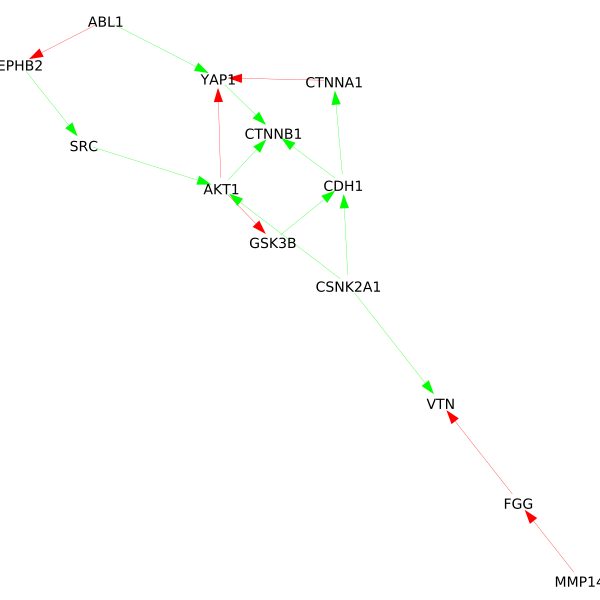

In [12]:
#let's check the new net

new_net.generate_graph()
new_net.print_graph()

In [13]:
#Now, let's say that I have a big network and I need all the connected genes to a specific one, here is how to 
# retrieve them:

new_net.get_neighbours("MMP14")

[<Interaction: FGG <=(-)======== MMP14 [Evidences: SIGNOR (1 references)]>]

In [14]:
# and now let's export our network to a bnet file in order to use it with MaBoSS and friends

new_net.write_bnet()